In [56]:
# Topic Modeling
# 맥락과 관련된 단어들을 이용하여 주제를 찾아내는 알고리즘..

In [57]:
!pip install gensim

In [58]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim
from nltk.tokenize import RegexpTokenizer

In [82]:
from gensim.corpora import Dictionary
text1 = [['man','female','man','human','man'],['woman','boy','human','man','woman']]

dictionary = Dictionary(text1)
for i in dictionary.items():
    print(i)

(0, 'female')
(1, 'human')
(2, 'man')
(3, 'boy')
(4, 'woman')


In [83]:
[dictionary.doc2bow(text) for text in text1]

[[(0, 1), (1, 1), (2, 3)], [(1, 1), (2, 1), (3, 1), (4, 2)]]

In [85]:
dictionary.doc2bow(['man','woman','boy','female','man','woman','man'])

[(0, 1), (2, 3), (3, 1), (4, 2)]

In [86]:
dictionary.doc2idx(['man','woman','boy','female','man','woman','man'])

[2, 4, 3, 0, 2, 4, 2]

In [59]:
tokenizer = RegexpTokenizer('[\w]+')

In [60]:
stop_words = stopwords.words('english')

In [61]:
p_stemmer = PorterStemmer()  # 어근 복원 : runs, running, ran => run,  cars => car

In [89]:
doc_a = "Brocolli is good to eat. My brother likes to eat good brocolli, but not my mother."
doc_b = "My mother spends a lot of time driving my brother around to baseball practice."
doc_c = "Some health experts suggest that driving may cause increased tension and blood pressure."
doc_d = "I often feel pressure to perform well at school, but my mother never seems to drive my brother to do better."
doc_e = "Health professionals say that brocolli is good for your health."
doc_f = "Big data is a term used to refer to data sets that are too large or complex for traditional data-processing application software to adequately deal with."
doc_g = "Data with many cases offer greater statistical power, while data with higher complexity may lead to a higher false discovery rate"
doc_h = "Big data was originally associated with three key concepts: volume, variety, and velocity."
doc_i = "A 2016 definition states that 'Big data represents the information assets characterized by such a high volume, velocity and variety to require specific technology and analytical methods for its transformation into value'."
doc_j = "Data must be processed with advanced tools to reveal meaningful information."

In [90]:
# topics - keywords를 기준으로 keywords의 빈도(중요도)를 계산해서 문서의 유사도

# 1. health, 
# 2. food
# 3. bigdata
# 4. drive
# 5. data

In [91]:
p_stemmer = PorterStemmer()  # 어근 복원 : runs, running, ran => run,  cars => car

In [92]:
doc_set = [doc_a, doc_b, doc_c, doc_d, doc_e, doc_f, doc_g, doc_h, doc_i,doc_j]

In [93]:
texts = []

In [94]:
for w in doc_set:
    raw = w.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in stop_words]
    stemmer_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmer_tokens)

In [95]:
texts

[['brocolli',
  'good',
  'eat',
  'brother',
  'like',
  'eat',
  'good',
  'brocolli',
  'mother'],
 ['mother',
  'spend',
  'lot',
  'time',
  'drive',
  'brother',
  'around',
  'basebal',
  'practic'],
 ['health',
  'expert',
  'suggest',
  'drive',
  'may',
  'caus',
  'increas',
  'tension',
  'blood',
  'pressur'],
 ['often',
  'feel',
  'pressur',
  'perform',
  'well',
  'school',
  'mother',
  'never',
  'seem',
  'drive',
  'brother',
  'better'],
 ['health', 'profession', 'say', 'brocolli', 'good', 'health'],
 ['big',
  'data',
  'term',
  'use',
  'refer',
  'data',
  'set',
  'larg',
  'complex',
  'tradit',
  'data',
  'process',
  'applic',
  'softwar',
  'adequ',
  'deal'],
 ['data',
  'mani',
  'case',
  'offer',
  'greater',
  'statist',
  'power',
  'data',
  'higher',
  'complex',
  'may',
  'lead',
  'higher',
  'fals',
  'discoveri',
  'rate'],
 ['big',
  'data',
  'origin',
  'associ',
  'three',
  'key',
  'concept',
  'volum',
  'varieti',
  'veloc'],
 ['2016

In [96]:
dictionary = corpora.Dictionary(texts)  # Dictionary : token에 index를 붙여서 사전을 만든다

In [97]:
for w in dictionary.items():
    print(w)

(0, 'brocolli')
(1, 'brother')
(2, 'eat')
(3, 'good')
(4, 'like')
(5, 'mother')
(6, 'around')
(7, 'basebal')
(8, 'drive')
(9, 'lot')
(10, 'practic')
(11, 'spend')
(12, 'time')
(13, 'blood')
(14, 'caus')
(15, 'expert')
(16, 'health')
(17, 'increas')
(18, 'may')
(19, 'pressur')
(20, 'suggest')
(21, 'tension')
(22, 'better')
(23, 'feel')
(24, 'never')
(25, 'often')
(26, 'perform')
(27, 'school')
(28, 'seem')
(29, 'well')
(30, 'profession')
(31, 'say')
(32, 'adequ')
(33, 'applic')
(34, 'big')
(35, 'complex')
(36, 'data')
(37, 'deal')
(38, 'larg')
(39, 'process')
(40, 'refer')
(41, 'set')
(42, 'softwar')
(43, 'term')
(44, 'tradit')
(45, 'use')
(46, 'case')
(47, 'discoveri')
(48, 'fals')
(49, 'greater')
(50, 'higher')
(51, 'lead')
(52, 'mani')
(53, 'offer')
(54, 'power')
(55, 'rate')
(56, 'statist')
(57, 'associ')
(58, 'concept')
(59, 'key')
(60, 'origin')
(61, 'three')
(62, 'varieti')
(63, 'veloc')
(64, 'volum')
(65, '2016')
(66, 'analyt')
(67, 'asset')
(68, 'character')
(69, 'definit')
(70

In [98]:
dictionary.token2id

{'brocolli': 0,
 'brother': 1,
 'eat': 2,
 'good': 3,
 'like': 4,
 'mother': 5,
 'around': 6,
 'basebal': 7,
 'drive': 8,
 'lot': 9,
 'practic': 10,
 'spend': 11,
 'time': 12,
 'blood': 13,
 'caus': 14,
 'expert': 15,
 'health': 16,
 'increas': 17,
 'may': 18,
 'pressur': 19,
 'suggest': 20,
 'tension': 21,
 'better': 22,
 'feel': 23,
 'never': 24,
 'often': 25,
 'perform': 26,
 'school': 27,
 'seem': 28,
 'well': 29,
 'profession': 30,
 'say': 31,
 'adequ': 32,
 'applic': 33,
 'big': 34,
 'complex': 35,
 'data': 36,
 'deal': 37,
 'larg': 38,
 'process': 39,
 'refer': 40,
 'set': 41,
 'softwar': 42,
 'term': 43,
 'tradit': 44,
 'use': 45,
 'case': 46,
 'discoveri': 47,
 'fals': 48,
 'greater': 49,
 'higher': 50,
 'lead': 51,
 'mani': 52,
 'offer': 53,
 'power': 54,
 'rate': 55,
 'statist': 56,
 'associ': 57,
 'concept': 58,
 'key': 59,
 'origin': 60,
 'three': 61,
 'varieti': 62,
 'veloc': 63,
 'volum': 64,
 '2016': 65,
 'analyt': 66,
 'asset': 67,
 'character': 68,
 'definit': 69,
 'h

In [99]:
import numpy as np

In [100]:
print(texts[0])

['brocolli', 'good', 'eat', 'brother', 'like', 'eat', 'good', 'brocolli', 'mother']


In [101]:
print(np.unique(np.array(texts[0])))

['brocolli' 'brother' 'eat' 'good' 'like' 'mother']


In [102]:
dictionary.doc2bow(texts[0])  # token의 빈도를 tuple

[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1)]

In [103]:
texts[1]

['mother',
 'spend',
 'lot',
 'time',
 'drive',
 'brother',
 'around',
 'basebal',
 'practic']

In [104]:
corpus = [dictionary.doc2bow(text) for text in texts]   # (token idx, frequency)
corpus

[[(0, 2), (1, 1), (2, 2), (3, 2), (4, 1), (5, 1)],
 [(1, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(8, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1)],
 [(1, 1),
  (5, 1),
  (8, 1),
  (19, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1)],
 [(0, 1), (3, 1), (16, 2), (30, 1), (31, 1)],
 [(32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 3),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1)],
 [(18, 1),
  (35, 1),
  (36, 2),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 2),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1)],
 [(34, 1),
  (36, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(34, 1),
  (36, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),

In [105]:
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary)

In [106]:
ldamodel.print_topics(num_words=7)  # topic별 중요 token

[(0,
  '0.043*"higher" + 0.043*"data" + 0.029*"drive" + 0.028*"brother" + 0.028*"mother" + 0.027*"basebal" + 0.027*"around"'),
 (1,
  '0.081*"data" + 0.039*"big" + 0.028*"inform" + 0.028*"veloc" + 0.028*"varieti" + 0.028*"volum" + 0.027*"process"'),
 (2,
  '0.059*"brocolli" + 0.058*"good" + 0.058*"eat" + 0.050*"brother" + 0.049*"mother" + 0.032*"like" + 0.026*"seem"'),
 (3,
  '0.087*"health" + 0.034*"brocolli" + 0.034*"good" + 0.034*"profession" + 0.034*"say" + 0.033*"suggest" + 0.032*"drive"')]

In [107]:
ldamodel.get_document_topics(corpus)

In [108]:
ldamodel.get_document_topics(corpus)[0]

[(0, 0.025172746), (1, 0.02502993), (2, 0.92445314), (3, 0.025344152)]

In [109]:
ldamodel.get_document_topics(corpus)[2]

[(0, 0.023021443), (1, 0.022775862), (2, 0.022930415), (3, 0.9312723)]

In [110]:
for d in ldamodel.get_document_topics(corpus):
    print(d)

[(0, 0.02517275), (1, 0.02502993), (2, 0.92445296), (3, 0.025344372)]
[(0, 0.9236897), (1, 0.025084214), (2, 0.026006673), (3, 0.025219427)]
[(0, 0.023025092), (1, 0.022775864), (2, 0.022931138), (3, 0.9312679)]
[(0, 0.019502891), (1, 0.019451631), (2, 0.9414626), (3, 0.019582927)]
[(0, 0.035744857), (1, 0.0357296), (2, 0.03767015), (3, 0.89085543)]
[(0, 0.014920109), (1, 0.95561), (2, 0.014734318), (3, 0.014735567)]
[(0, 0.95540094), (1, 0.015074488), (2, 0.014726508), (3, 0.014798041)]
[(0, 0.022822782), (1, 0.9316399), (2, 0.022769883), (3, 0.022767447)]
[(0, 0.011940657), (1, 0.96420217), (2, 0.011928127), (3, 0.011929014)]
[(0, 0.027923558), (1, 0.91641253), (2, 0.027830722), (3, 0.02783316)]


In [ ]:
# LDA Topic modeling : perplexity, coherence

# perplexity (혼란)
# 문헌 내 주제 출현확률과 주제 내 용어출현 확률

In [114]:
import matplotlib.pyplot as plt

In [111]:
from gensim.models import CoherenceModel

print(ldamodel.log_perplexity(corpus))

-4.976840805904619


In [112]:
perplexity_values = []

for i in range(2,10):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, \
                                               id2word=dictionary)
    perplexity_values.append(ldamodel.log_perplexity(corpus))

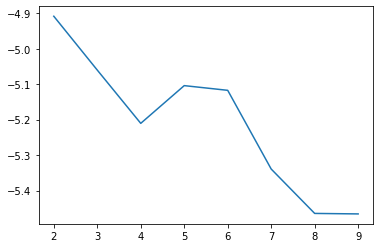

In [115]:
plt.plot(range(2,10), perplexity_values)